[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mGfwiN4bkWtV_LrwEpv28Avp0tie-byO?usp=sharing)

## Loading dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt
import random

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 6s 0us/step


## An overview of the images

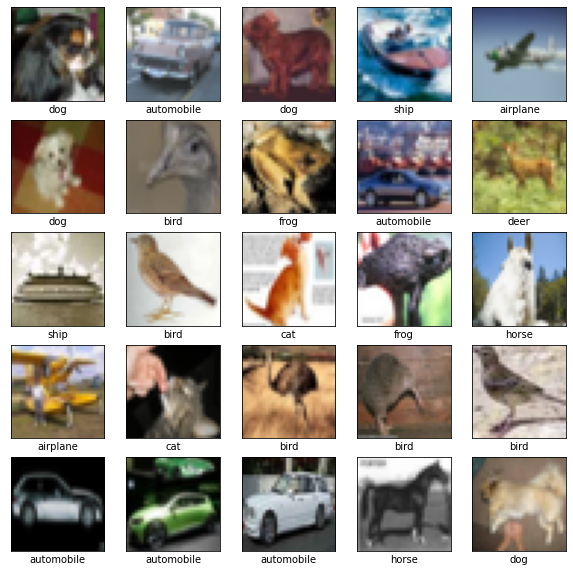

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

train_idx = list(range(len(train_labels)))

random.seed(1)
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[random_sample[i]][0]])
plt.show()

## Color channels

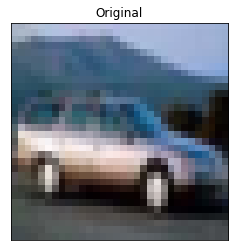

In [ ]:
image_id = 4
plt.figure()
plt.imshow(train_images[image_id], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Original')
plt.show()

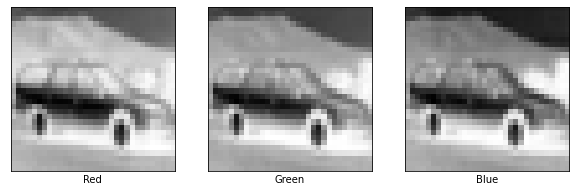

In [ ]:
channel = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[image_id][:,:, i], cmap=plt.cm.binary)
    plt.xlabel(channel[i])
plt.show()


##Build, compile and train the model

## Challenge 1

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

Make changes only in the cell below

In [ ]:
#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),                           
  tf.keras.layers.Dense(1024, activation='relu'), 
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 [==============================] - 5s 10ms/step - loss: 1.9174 - accuracy: 0.3015 - val_loss: 1.7236 - val_accuracy: 0.3876
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.7046 - accuracy: 0.3864 - val_loss: 1.6632 - val_accuracy: 0.4036
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 1.6089 - accuracy: 0.4223 - val_loss: 1.5347 - val_accuracy: 0.4539
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 1.5414 - accuracy: 0.4493 - val_loss: 1.5162 - val_accuracy: 0.4679
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 1.4898 - accuracy: 0.4663 - val_loss: 1.4961 - val_accuracy: 0.4696
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 1.4492 - accuracy: 0.4815 - val_loss: 1.4757 - val_accuracy: 0.4698
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 1.4103 - accuracy: 0.4943 - val_loss: 1.4351 - val_accuracy: 0.4872

## Challenge 2

Make changes only to the cell below

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images[:,:,:,0], train_labels))
train_dataset

<TensorSliceDataset shapes: ((32, 32), (1,)), types: (tf.float64, tf.uint8)>

In [ ]:
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000][:,:,:,0], test_labels[:5000]))
validation_dataset

<TensorSliceDataset shapes: ((32, 32), (1,)), types: (tf.float64, tf.uint8)>

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:][:,:,:,0], test_labels[5000:]))
test_dataset

<TensorSliceDataset shapes: ((32, 32), (1,)), types: (tf.float64, tf.uint8)>

In [ ]:


TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

VALIDATION_STEPS = VALIDATION_DATASET_SIZE // BATCH_SIZE

#build
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),                           
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'),                              
  tf.keras.layers.Dense(10),                             
  ])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(
    train_dataset,
    epochs=10, 
    validation_data=validation_dataset,
    validation_steps=VALIDATION_STEPS)

_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 2.0951 - accuracy: 0.2349 - val_loss: 2.0022 - val_accuracy: 0.2879
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.9635 - accuracy: 0.2934 - val_loss: 1.9181 - val_accuracy: 0.3307
Epoch 3/10
391/391 [==============================] - 2s 4ms/step - loss: 1.9024 - accuracy: 0.3211 - val_loss: 1.8627 - val_accuracy: 0.3448
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 1.8594 - accuracy: 0.3321 - val_loss: 1.8639 - val_accuracy: 0.3409
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 1.8235 - accuracy: 0.3480 - val_loss: 1.8145 - val_accuracy: 0.3546
Epoch 6/10
391/391 [==============================] - 2s 4ms/step - loss: 1.7982 - accuracy: 0.3581 - val_loss: 1.8322 - val_accuracy: 0.3472
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7766 - accuracy: 0.3674 - val_loss: 1.7846 - val_accuracy: 0.3704
Epoch 